<a href="https://colab.research.google.com/github/aleksejalex/special-octo-engine/blob/main/01ZLMA_ex12_loglinear_task_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA - Exercise 12
Exercise 12 of the course 01ZLMA. 

## Contents

* Log-linear models with Poisson/count data
 ---


In [ ]:
drugs = read.table("https://raw.githubusercontent.com/francji1/01ZLMA/main/data/drugs.txt", header = TRUE, sep = ";", dec = ".")
drugs

Tasks:

* Convert the data to the appropriate format and data type to use the loglinear glm model:


* Draw interactions between individual drug addictions.


* Create models with mutually independent variables, pairwise dependent and saturated model.


* Is the model with independent variables of sufficient quality? What is the chance that the person in the study will use marijuana? What is the probability that the person in the study will drink alcohol? List the appropriate test to confirm the quality of the model.


* Test a model where all variables are mutually dependent and the conditional ratios of the sum of two variables do not depend on the third variable.
What is the ratio of smoking for turkey among alcoholics than abstinent?
Answer: Among alcoholics, there is a chance that smoking will be X times bigger/smaller.


* Is the model with mutual interactions of sufficient quality, or is there a need to switch to a saturated model?


* For all models, provide predictions of expected dependence counts and residual virgin statistics.


* Among abstinents, is there less of a chance that smoking marijuana will also be smoking cigarettes or vice versa?

In [1]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import requests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )


4
['examplevarr']


In [46]:
# additional settings for plotting images:
#plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [4]:
imported_data = pd.read_csv("https://raw.githubusercontent.com/francji1/01ZLMA/main/data/drugs.txt", delimiter=";")

In [5]:
imported_data

,alcohol,cigarettes,marijuana,count
0,yes,yes,yes,911
1,yes,yes,no,538
2,yes,no,yes,44
3,yes,no,no,456
4,no,yes,yes,3
5,no,yes,no,43
6,no,no,yes,2
7,no,no,no,279


In [40]:
imported_data['alcohol'] = pd.factorize(imported_data['alcohol'])[0] # python faktorizuje tak, ze pro 'yes' vrati 0 a pro 'no' 1, proto opravime:
imported_data['alcohol'] = np.abs(imported_data['alcohol'] - 1)
imported_data['cigarettes'] = pd.factorize(imported_data['cigarettes'])[0]
imported_data['alcohol'] = np.abs(imported_data['alcohol'] - 1)
imported_data['marijuana'] = pd.factorize(imported_data['marijuana'])[0]
imported_data['alcohol'] = np.abs(imported_data['alcohol'] - 1)

In [41]:
imported_data

,alcohol,cigarettes,marijuana,count
0,1,0,0,911
1,1,0,1,538
2,1,1,0,44
3,1,1,1,456
4,0,0,0,3
5,0,0,1,43
6,0,1,0,2
7,0,1,1,279


## interaction plot

In [ ]:
# Create an interaction plot using seaborn
# sbn.catplot(x='Factor1', y='Response', hue='Factor2', data=df, kind='point')

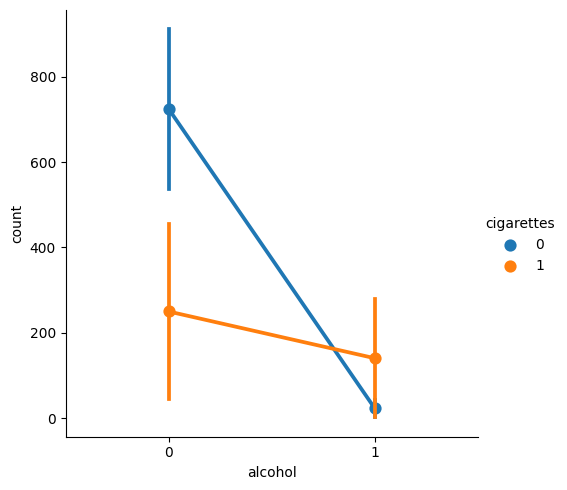

In [17]:
# Create an interaction plot using seaborn
sbn.catplot(x='alcohol', y='count', hue='cigarettes', data=imported_data, kind='point')

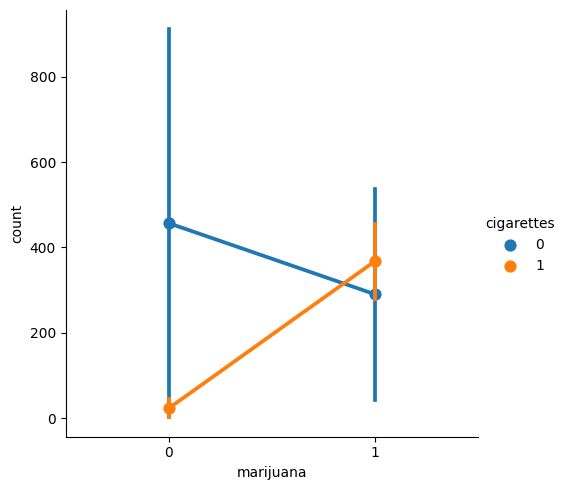

In [21]:
sbn.catplot(x='marijuana', y='count', hue='cigarettes', data=imported_data, kind='point')

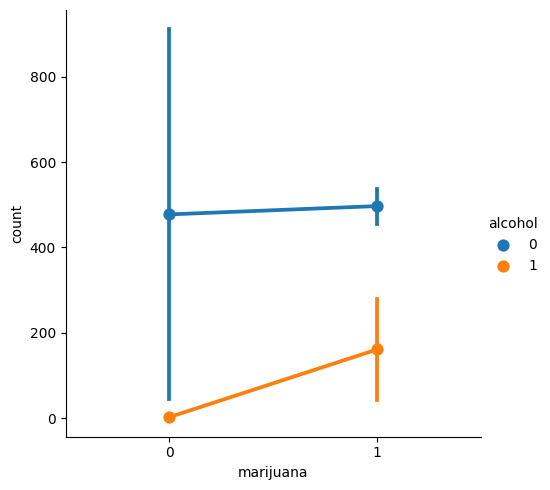

In [22]:
sbn.catplot(x='marijuana', y='count', hue='alcohol', data=imported_data, kind='point')

In [ ]:
# mame stejne obrazky jako v Rku, hura!

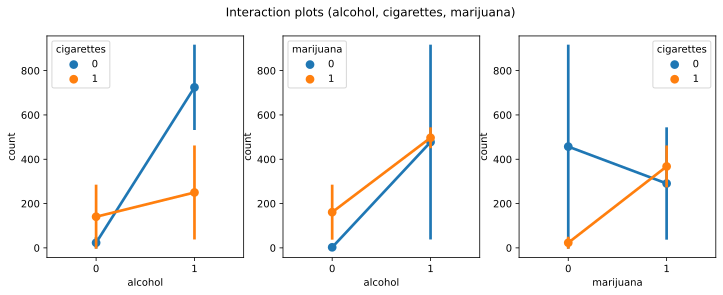

In [48]:
fig, axs = plt.subplots(1, 3, figsize = (12, 4))

sbn.pointplot(x='alcohol', y='count', hue='cigarettes', data=imported_data, ax = axs[0])
sbn.pointplot(x='alcohol', y='count', hue='marijuana', data=imported_data, ax = axs[1])
sbn.pointplot(x='marijuana', y='count', hue='cigarettes', data=imported_data,  ax = axs[2])

fig.suptitle("Interaction plots (alcohol, cigarettes, marijuana)")
fig.show()

In [20]:
#statsmodels.graphics.factorplots.interaction_plot(x='alcohol', trace='cigarettes', response='count', data=imported_data)

## Model

In [49]:
model_a_c_m = statsmodels.formula.api.glm(formula='count ~ alcohol + cigarettes + marijuana', data = imported_data, family = statsmodels.api.families.Poisson())
results_a_c_m = model_a_c_m.fit()

print(results_a_c_m.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                    8
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -667.53
Date:                Mon, 15 May 2023   Deviance:                       1286.0
Time:                        09:30:42   Pearson chi2:                 1.41e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5064      0.062     72.254      0.0

HW:

Read an analysis from https://stats.oarc.ucla.edu/r/dae/poisson-regression/

Rerun the analysis with the assumption of over/under dispersion, i.e dispersion parameter not equal to 1. How does results change?

Discuss the results and compute the difference in expected number of awards for model with dispersion parameter equal to 1 and smaller/larger. Plot both estimated curves for all programs.



In [ ]:
awards <- read.csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
awards